In [1]:
##https://www.kaggle.com/chenyangxxxxxxx/p2p-lending
import pandas as pd
import numpy as np
import klib
import shapash
import sklearn
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
#import lazypredict
import seaborn as sns
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('P2P_Lending - Copy.csv')
df;


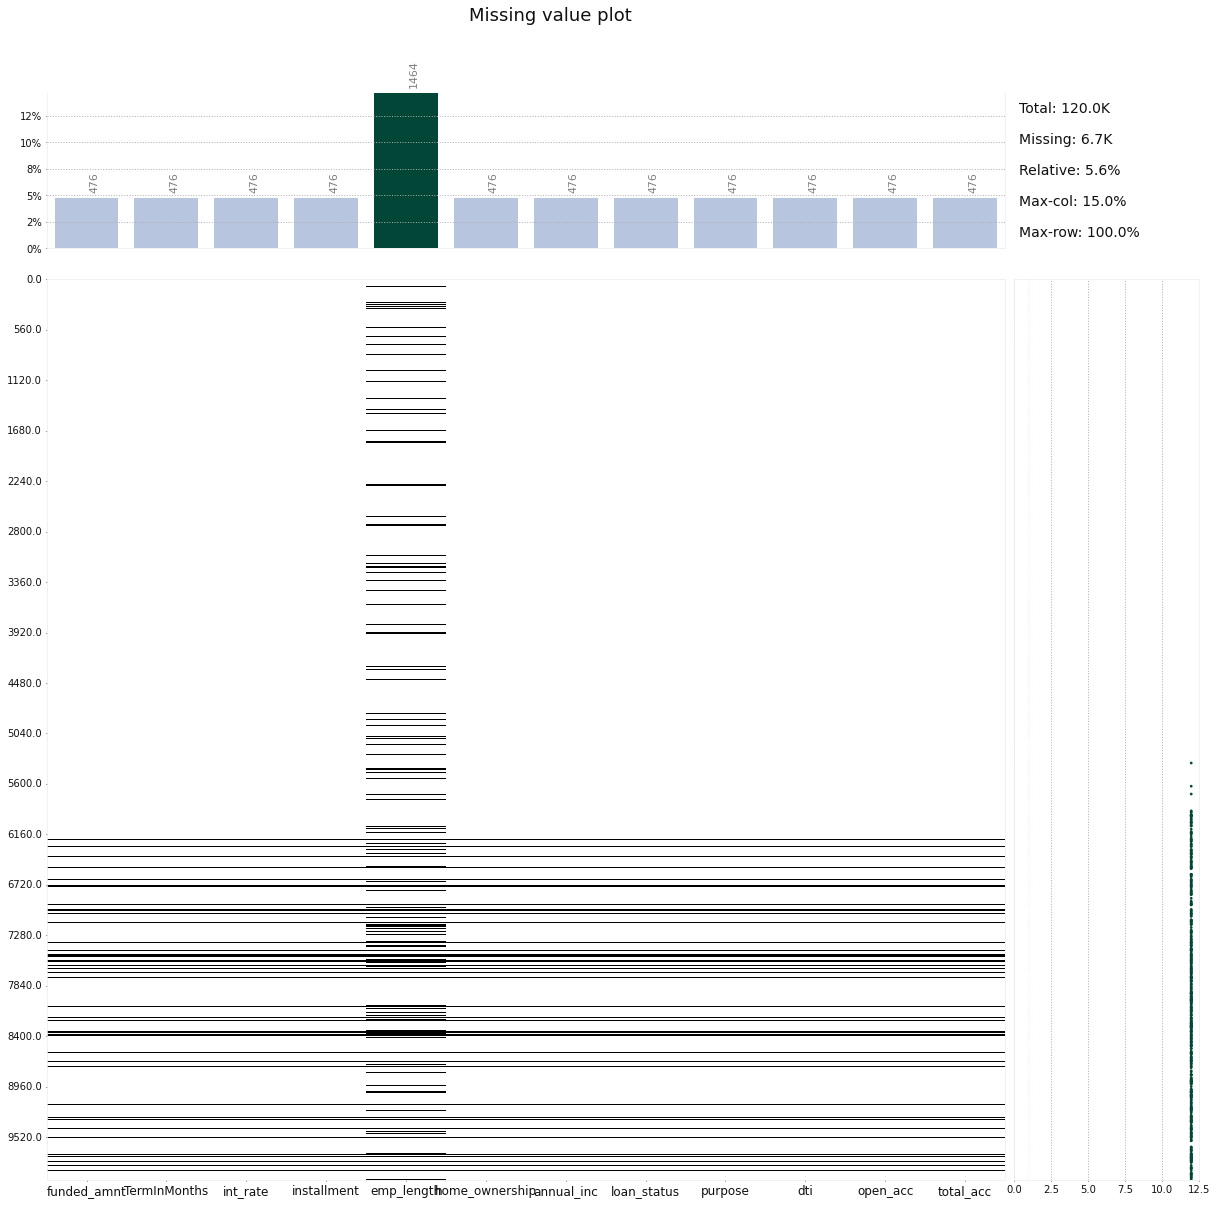

In [3]:
klib.missingval_plot(df);

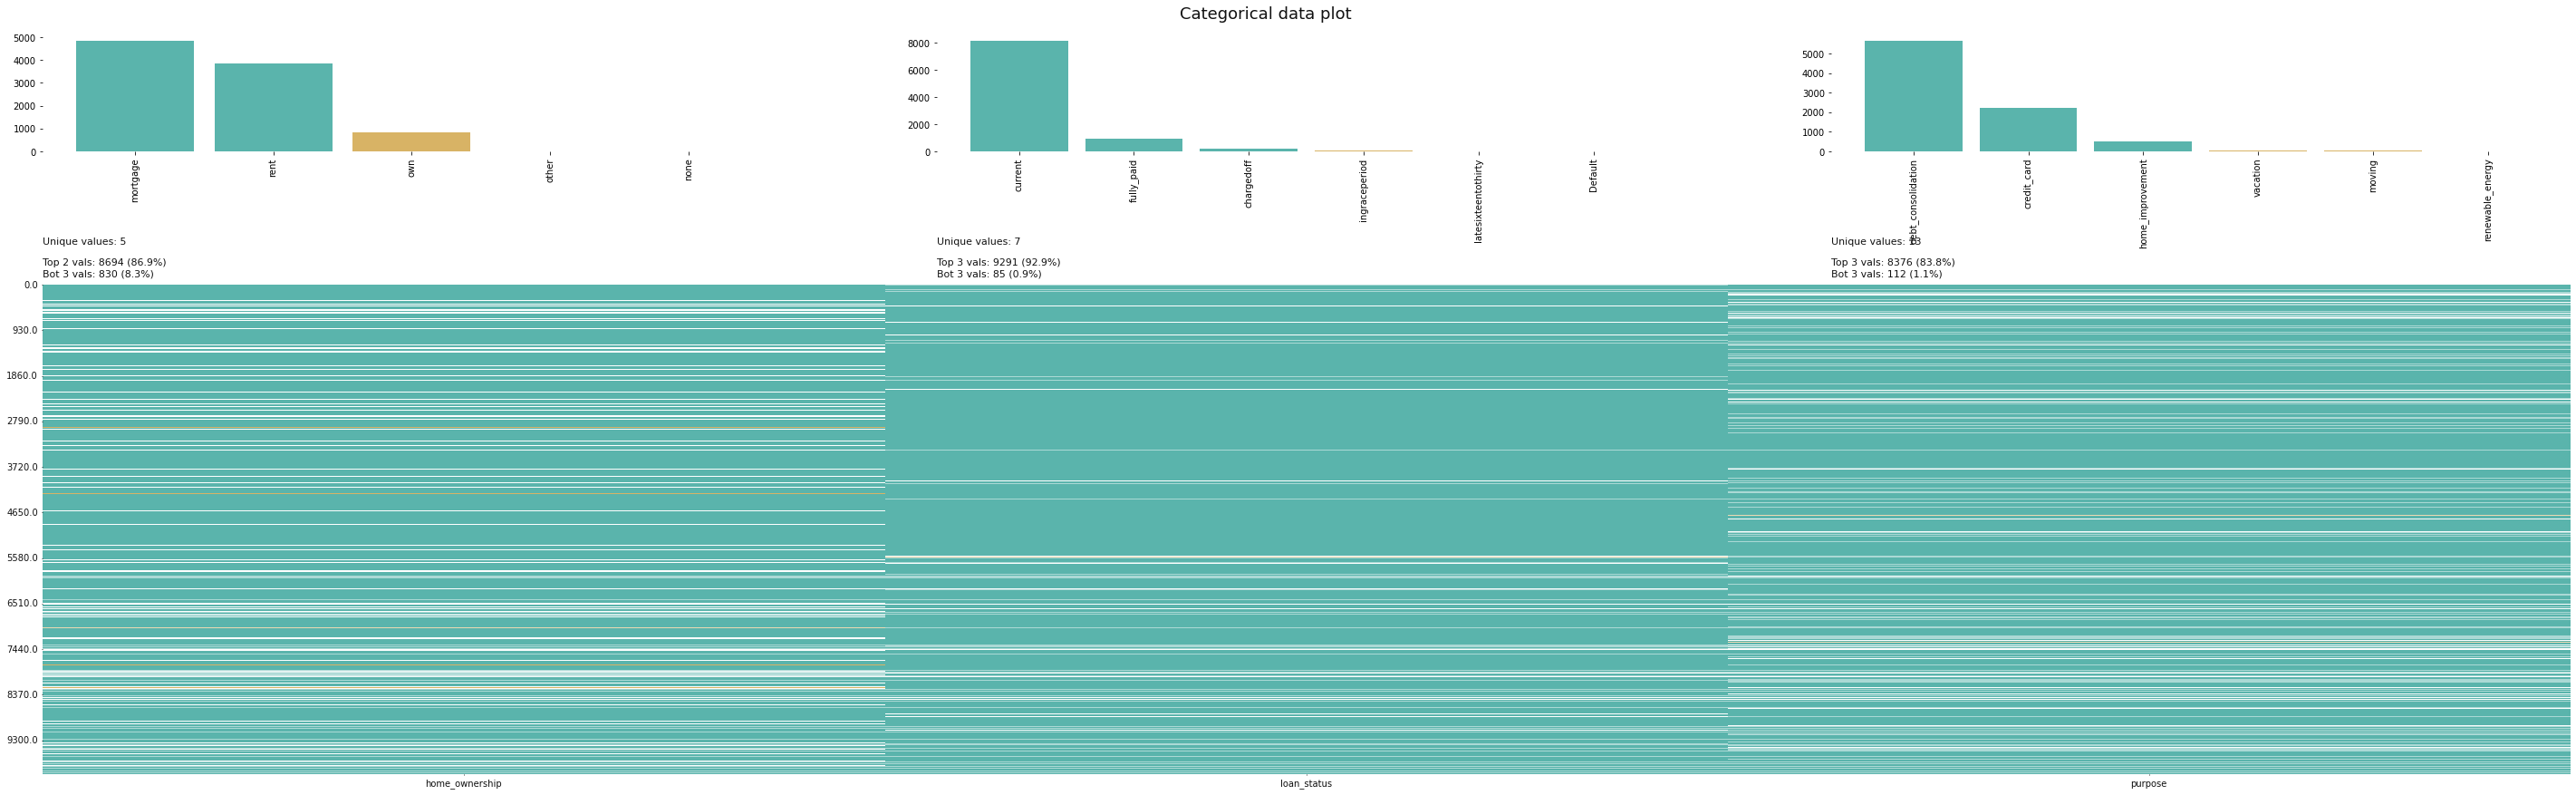

In [4]:
klib.cat_plot(df, figsize=(50,15));

In [5]:
df=df.dropna()

In [6]:
df.dtypes;

In [7]:
#df[''] = df['funded_amnt'].replace('[^\d.]','',regex=True).astype(float);
df['TermInMonths'] = df['TermInMonths'].replace('[^\d.]','',regex=True).astype(float);
df['int_rate'] = df['int_rate'].replace('[^\d.]','',regex=True).astype(float);
df['installment'] = df['installment'].replace('[^\d.]','',regex=True).astype(float);
df['emp_length'] = df['emp_length'].replace('[^\d.]','',regex=True).astype(float);
df['annual_inc'] = df['annual_inc'].replace('[^\d.]','',regex=True).astype(float);
df['dti'] = df['dti'].replace('[^\d.]','',regex=True).astype(float);
df['open_acc'] = df['open_acc'].replace('[^\d.]','',regex=True).astype(float);
df['total_acc'] = df['total_acc'].replace('[^\d.]','',regex=True).astype(float)

In [8]:
df.dtypes;

df['funded_amnt'].replace(to_replace="[a-zA-Z]", value='', 
regex=True, inplace=True)

df.values

In [9]:
df.dtypes;

In [10]:

df['TermInMonths'] = df['TermInMonths'].astype('int64')
df['emp_length'] = df['emp_length'].astype('int64')
df['annual_inc'] = df['annual_inc'].astype('int64')
df['dti'] = df['dti'].astype('int64')
df['open_acc'] = df['open_acc'].astype('int64')
df['total_acc'] = df['total_acc'].astype('int64')
df.dtypes;


In [11]:
df;

In [12]:
feature_names=list(df.columns)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [14]:
for col in df[['TermInMonths','home_ownership','loan_status','purpose']]:
    print(df[col].value_counts())
    print('-'*75);

36    6448
60    2088
Name: TermInMonths, dtype: int64
---------------------------------------------------------------------------
mortgage    4422
rent        3407
own          706
none           1
Name: home_ownership, dtype: int64
---------------------------------------------------------------------------
current                     7283
fully_paid                   854
chargedoff                   194
latethirtyonetoonetwenty     134
ingraceperiod                 40
latesixteentothirty           16
Default                       15
Name: loan_status, dtype: int64
---------------------------------------------------------------------------
debt_consolidation    5131
credit_card           1961
home_improvement       438
other                  383
major_purchase         159
small_business         132
car                     75
medical                 60
wedding                 52
house                   50
moving                  43
vacation                41
renewable_energy        11


In [15]:
df;

In [16]:
df= klib.data_cleaning(df);

Shape of cleaned data: (8536, 12)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.88 MB (-80.0%)



In [17]:
def Encode(df,variable):
    encoded_Variable = df[variable].value_counts().to_dict()
    df[variable] = df[variable].map(encoded_Variable);

for col in df[['TermInMonths','home_ownership','loan_status','purpose']]:
    Encode(df,col)

In [18]:
for col in df[['home_ownership','loan_status','purpose']]:
    Encode(df,col)

In [19]:
df.head();

In [20]:
df_corr = df.corr()
index = df_corr.index;

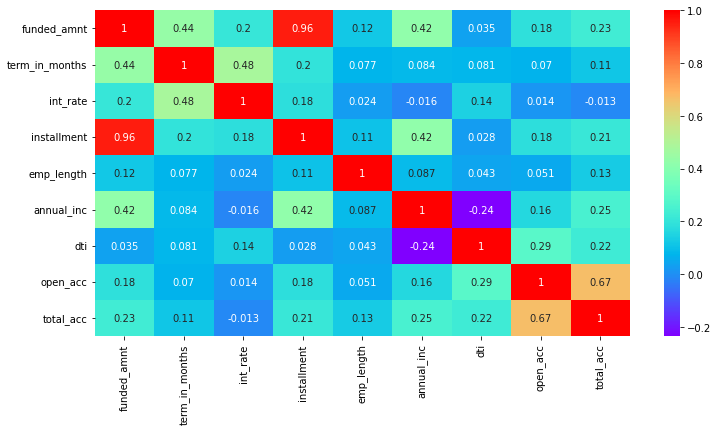

In [21]:
plt.figure(figsize = (12,6))
sns.heatmap(df[index].corr(),annot = True,cmap = 'rainbow');

In [22]:
X = df.drop(['int_rate'],axis = 1)
y = df['int_rate']

In [23]:
X;

In [24]:
X;

In [25]:
y;

0       10.16
1       18.49
2         8.9
3         7.9
4         7.9
        ...  
8531    14.98
8532    17.57
8533    13.53
8534      7.9
8535    15.61
Name: int_rate, Length: 8536, dtype: Float32

In [26]:
threshold = .52

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

correlation(X,threshold);

In [27]:
model=RandomForestRegressor(random_state = 101)
model.fit(X,y)

RandomForestRegressor(random_state=101)

In [28]:
model.feature_importances_

array([0.22656667, 0.22968185, 0.30771871, 0.01873096, 0.02823285,
       0.04773185, 0.00738827, 0.03450771, 0.0374081 , 0.02601815,
       0.03601487])

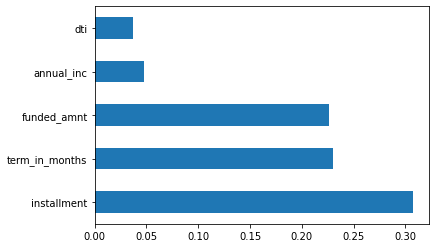

In [29]:
pd.Series(model.feature_importances_, index = X.columns).nlargest(5).plot(kind = 'barh');

In [30]:
rf = RandomForestRegressor()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [33]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid);

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,random_state=42, n_jobs = 1)

In [35]:
rf_random.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.5s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.9s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.9s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.3s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.2s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.0s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   6.7s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   6.7s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   6.7s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   6.6s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   6.8s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  11.8s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  11.9s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  12.1s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  12.3s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  12.2s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  19.8s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  19.5s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  19.4s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  19.4s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  19.7s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  17.9s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  17.9s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.1s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.0s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.1s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   6.5s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   6.5s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   6.5s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   6.5s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   6.5s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   3.3s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   3.4s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   3.4s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   3.4s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   3.4s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.1s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.3s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.3s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.1s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.1s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  22.5s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  22.2s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  22.4s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  23.3s


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  23.1s


In [36]:
y_pred = rf_random.predict(X_test)

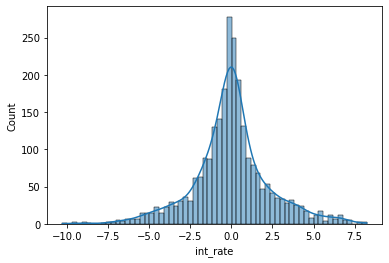

In [37]:
sns.histplot(y_test - y_pred,kde = True);

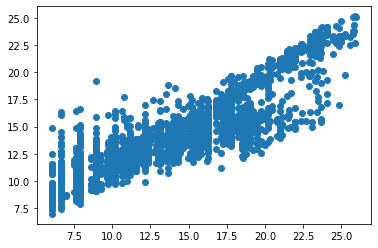

In [38]:
plt.scatter(y_test,y_pred);

In [39]:
param_grid = {
    'max_depth': [rf_random.best_params_['max_depth']],
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_leaf': [rf_random.best_params_['min_samples_leaf'], 
                         rf_random.best_params_['min_samples_leaf']+2],
    'min_samples_split': [rf_random.best_params_['min_samples_split'] - 2,
                          rf_random.best_params_['min_samples_split'] - 1,
                          rf_random.best_params_['min_samples_split'], 
                          rf_random.best_params_['min_samples_split'] +1,
                          rf_random.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_random.best_params_['n_estimators'] - 100, 
                     rf_random.best_params_['n_estimators'], 
                     rf_random.best_params_['n_estimators'] + 100]
}

print(param_grid);

{'max_depth': [20], 'max_features': ['auto'], 'min_samples_leaf': [1, 3], 'min_samples_split': [13, 14, 15, 16, 17], 'n_estimators': [600, 700, 800]}


In [40]:
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train);

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [41]:
grid_search;

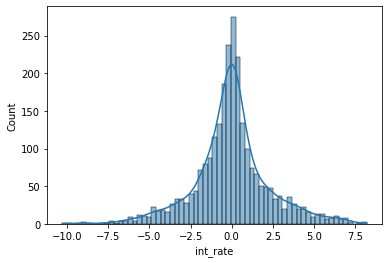

In [42]:
y_pred=grid_search.predict(X_test)
sns.histplot(y_test - y_pred, kde = True);

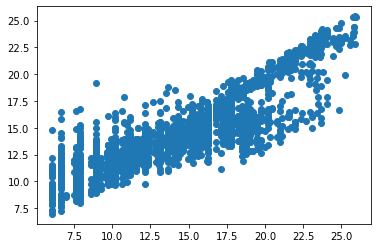

In [43]:
plt.scatter(y_test, y_pred);

In [44]:
params = {'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200])
    }

In [45]:
params

{'max_depth': <hyperopt.pyll.base.Apply at 0x2374b1531f0>,
 'max_features': <hyperopt.pyll.base.Apply at 0x2374b0ece50>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x2374b0ecfd0>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x2374a498d30>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x2374b14d760>}

In [46]:
y_pred = model.predict(X_test)

In [47]:
model.score(X_train, y_train);

C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


In [48]:
from shapash.explainer.smart_explainer import SmartExplainer

In [49]:
xpl = SmartExplainer()

In [50]:
xpl.compile(
    x=X_test,
    model=model.fit(X,y),
   
)

Backend: Shap TreeExplainer


In [51]:
xpl

In [52]:
app = xpl.run_app(title_story='interest pred')

C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\shapash\webapp\smart_app.py:306: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

INFO:root:Your Shapash application run on http://DESKTOP-M39AD9B:8050/


Dash is running on http://0.0.0.0:8050/



INFO:root:Use the method .kill() to down your app.
INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app 'shapash.webapp.smart_app' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [53]:
loanregressor = xpl.to_smartpredictor()

In [54]:
loanregressor.save('./loanregressor45copy.pkl')

INFO:werkzeug: * Running on http://192.168.1.7:8050/ (Press CTRL+C to quit)


In [55]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)));

C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



MAE: 0.46776287316438137
MSE: 0.5370044740123368
RMSE: 0.7328058910873579


C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



In [56]:
metrics.r2_score(y_test, y_pred)

C:\Users\Fahad\Anaconda3\envs\intpred\lib\site-packages\sklearn\metrics\_regression.py:90: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



0.9721412711346977

In [57]:
Data_predict = model.predict(X_test) #Predictions on Testing data
display(Data_predict);

array([18.36559958, 14.6608    , 11.25260025, ..., 15.84900057,
       11.54490028, 17.36799987])

In [58]:

import pickle
# open a file, where you ant to store the data
file = open('loanreg45copy.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)


In [59]:
modelpk = open('loanreg45copy.pkl','rb')
forest = pickle.load(modelpk)

In [60]:
X_test;

In [61]:
colval=list(X_test.columns.values)
display(colval);

['funded_amnt',
 'term_in_months',
 'installment',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'loan_status',
 'purpose',
 'dti',
 'open_acc',
 'total_acc']

In [62]:
from ipywidgets import widgets

In [63]:
funded_amnt=widgets.Label('funded amount')
display (funded_amnt)
text1=widgets.Text()
display(text1)

installment=widgets.Label('installment')
display (installment)
texta=widgets.Text()
display(texta)

emp_length=widgets.Label('emp lengtht')
display (emp_length)
textb=widgets.Text()
display(textb)

annual_inc=widgets.Label('annual income')
display (annual_inc)
text2=widgets.Text()
display(text2)

dti=widgets.Label('dti')
display (dti)
text3=widgets.Text()
display(text3)

open_acc=widgets.Label('open account')
display (open_acc)
text4=widgets.Text()
display(text4)

total_acc=widgets.Label('total account')
display (total_acc)
text5=widgets.Text()
display(text5)

TermInMonths=widgets.Dropdown(
                options=[('36', 6448), ('60', 2088)],
                value=6448,
                description='TermInMonths')
display(TermInMonths)
home_ownership=widgets.Dropdown(
                 options=[('MORTGAGE', 4422), ('RENT', 3407), ('OWN',706),('OTHER',1)],
                 value=4422,
                 description='home_ownership:')
display(home_ownership)
loan_status=widgets.Dropdown(
                 options=[('current',7283),('fully_paid',854),('chargedoff',194),('latethirtyonetoonetwenty',134),('ingraceperiod',40),('latesixteentothirty',16),('Default',16)],
                 value=7283,
                 description='loan_status')
display(loan_status)
purpose=widgets.Dropdown(
                 options=[('debt_consolidation',5131),('credit_card',1961),('other',383),('home_improvement',438),('major_purchase',159),('small_business',132),('car',75),('wedding',52),('moving',43),('medical',60),('house',50),('vacation',41),('renewable_energy',11)],
                 value=5131,
                 description='purpose')
display(purpose)

btn=widgets.Button(description="predict")
display (btn)

def predict(b):
    a=int(text1.value)
    c=int(texta.value)
    d=int(textb.value)
    f=int(text2.value)
    i=int(text3.value)
    j=int(text4.value)
    k=int(text5.value)
    b=int(TermInMonths.value)
    e=int(home_ownership.value)
    g=int(loan_status.value)
    j=int(loan_status.value)
    h=int(purpose.value)
    lst = ['a','b','c','d','e','f','g','h','i','j','k']
    tdf = pd.DataFrame({'funded_amnt':[a],'term_in_months':[b],'installment':[c],'emp_length':[d],'home_ownership':[e],'annual_inc':[f],'loan_status':[g],'purpose':[h],'dti':[i],'open_acc':[j],'total_acc':[k]})
   
    resultval=model.predict(tdf)
    display(resultval)
btn.on_click(predict)
    




Label(value='funded amount')

Text(value='')

Label(value='installment')

Text(value='')

Label(value='emp lengtht')

Text(value='')

Label(value='annual income')

Text(value='')

Label(value='dti')

Text(value='')

Label(value='open account')

Text(value='')

Label(value='total account')

Text(value='')

Dropdown(description='TermInMonths', options=(('36', 6448), ('60', 2088)), value=6448)

Dropdown(description='home_ownership:', options=(('MORTGAGE', 4422), ('RENT', 3407), ('OWN', 706), ('OTHER', 1…

Dropdown(description='loan_status', options=(('current', 7283), ('fully_paid', 854), ('chargedoff', 194), ('la…

Dropdown(description='purpose', options=(('debt_consolidation', 5131), ('credit_card', 1961), ('other', 383), …

Button(description='predict', style=ButtonStyle())

In [65]:
df.describe()

,funded_amnt,term_in_months,int_rate,installment,emp_length,annual_inc,dti,open_acc,total_acc
count,8536.000000,8536.000000,8536.000000,8536.000000,8536.000000,8536.000000,8536.000000,8536.000000,8536.000000
mean,14517.405811,41.870665,14.300885,447.939374,6.475047,72628.261012,16.641518,11.076851,24.644447
std,8165.645996,10.317157,4.432665,244.579987,3.281210,44366.984565,7.587390,4.542781,10.902174
min,1000.000000,36.000000,6.030000,30.440001,1.000000,7500.000000,0.000000,1.000000,3.000000
25%,8000.000000,36.000000,11.140000,273.920013,3.000000,45000.000000,11.000000,8.000000,17.000000
50%,12800.000000,36.000000,14.090000,404.269989,7.000000,62857.500000,16.000000,10.000000,23.000000
75%,20000.000000,36.000000,17.270000,582.027466,10.000000,88000.000000,22.000000,14.000000,31.000000
max,35000.000000,60.000000,26.059999,1388.449951,10.000000,1000000.000000,34.000000,38.000000,68.000000
